<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Carga de los datos a un dataframe
df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data.csv",delimiter=";")


In [78]:
df.shape

(141, 104)

In [79]:
df.describe()

,ID,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,...,EE2,EE3,EE4,EE5,EE6,CSSC1,CSSC2,TLKS1,TLKS2,TLKS3
count,141.000000,130.000000,130.000000,130.000000,125.000000,125.000000,125.000000,125.000000,125.00000,124.000000,...,115.000000,109.000000,112.000000,112.000000,112.000000,124.000000,124.000000,124.000000,124.000000,123.000000
mean,71.000000,4.376923,4.284615,3.684615,4.592000,4.240000,4.400000,4.128000,4.44000,4.637097,...,3.860870,3.899083,3.312500,3.830357,3.821429,4.895161,4.459677,4.258065,3.298387,3.845528
std,40.847277,1.252999,1.101335,1.276105,1.198763,1.346441,1.257237,1.224587,1.37019,0.931252,...,1.336971,1.325986,1.445909,1.419862,1.363714,1.088137,1.143374,1.125253,1.331176,1.509709
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,36.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000
50%,71.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.00000,5.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,4.000000
75%,106.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,6.000000,5.000000,5.000000,4.000000,5.000000
max,141.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [80]:
df.head(10)

,ID,IDIOMA,AREA,EQUIPO,VD1,VD7,V1,V2,V3,SA1,...,EE3,EE4,EE5,EE6,CSSC1,CSSC2,TLKS1,TLKS2,TLKS3,Obs1
0,9,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,4.0,4.0,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,4.0,4.0,NaN
1,12,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,4.0,5.0,3.0,5.0,...,3.0,3.0,3.0,3.0,6.0,4.0,3.0,2.0,5.0,NaN
2,17,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Femenino,5.0,4.0,5.0,4.0,...,5.0,1.0,5.0,6.0,6.0,6.0,5.0,3.0,2.0,NaN
3,30,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,5.0,5.0,5.0,5.0,...,4.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,4.0,NaN
4,32,CASTELLANO,Tecnología,Astillero,Más de 20 años,Masculino,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,6.0,6.0,2.0,1.0,1.0,NaN
5,34,CASTELLANO,Tecnología,Astillero,Más de 20 años,Femenino,5.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,4.0,4.0,3.0,3.0,4.0,NaN
6,45,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,5.0,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,6.0,6.0,4.0,2.0,4.0,LKS TENDRIA QUE TENER UNA VISION MAS INTERNACI...
7,47,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,2.0,1.0,NaN
8,56,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,4.0,5.0,3.0,5.0,...,NaN,NaN,NaN,NaN,5.0,5.0,4.0,5.0,5.0,LKS deberí­a utilizar la oficina de Astillero ...
9,60,CASTELLANO,Tecnología,Astillero,Entre 11 y 20 años,Masculino,6.0,5.0,4.0,5.0,...,4.0,4.0,4.0,4.0,6.0,5.0,5.0,4.0,5.0,"Evolucionar los equipos, áreas y departamentos..."


Histograma de valores nulos por atributo en el dataframe original

In [81]:
missing_values = df.isnull().sum()


In [82]:
missing_percentage = (missing_values / len(df)) * 100

threshold = 1
attributes_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()


len(attributes_with_missing)

102

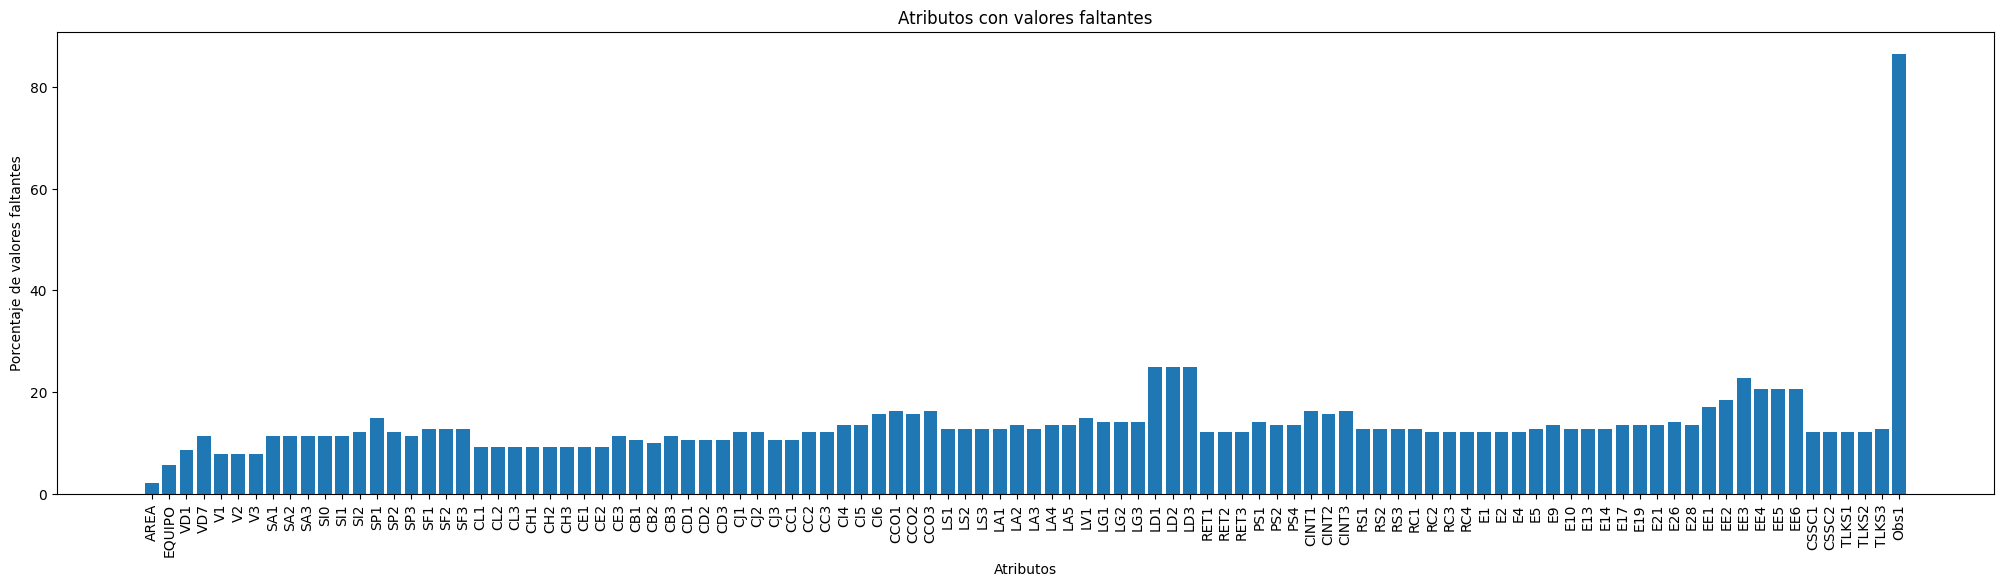

In [83]:
plt.figure(figsize=(25, 6))
plt.bar(attributes_with_missing, missing_percentage[attributes_with_missing])
plt.xlabel('Atributos')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Atributos con valores faltantes')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad

plt.show()

In [84]:
# Se especifican las 5 columnas iniciales de dimensiones
dimensiones = ['ID','IDIOMA', 'AREA', 'EQUIPO', 'VD1','VD7']

# Elimina los registros con todos los valores nulos, excepto las columnas de dimensiones
df_sin_nulos = df.dropna(subset=df.columns.difference(dimensiones), how='all',inplace=False)


In [85]:
df_sin_nulos.shape

(133, 104)

In [86]:
missing_values = df_sin_nulos.isnull().sum()


In [92]:
missing_percentage = (missing_values / len(df_sin_nulos)) * 100

threshold = 10
attributes_with_missing = missing_percentage[missing_percentage > threshold].index.tolist()


len(attributes_with_missing)

18

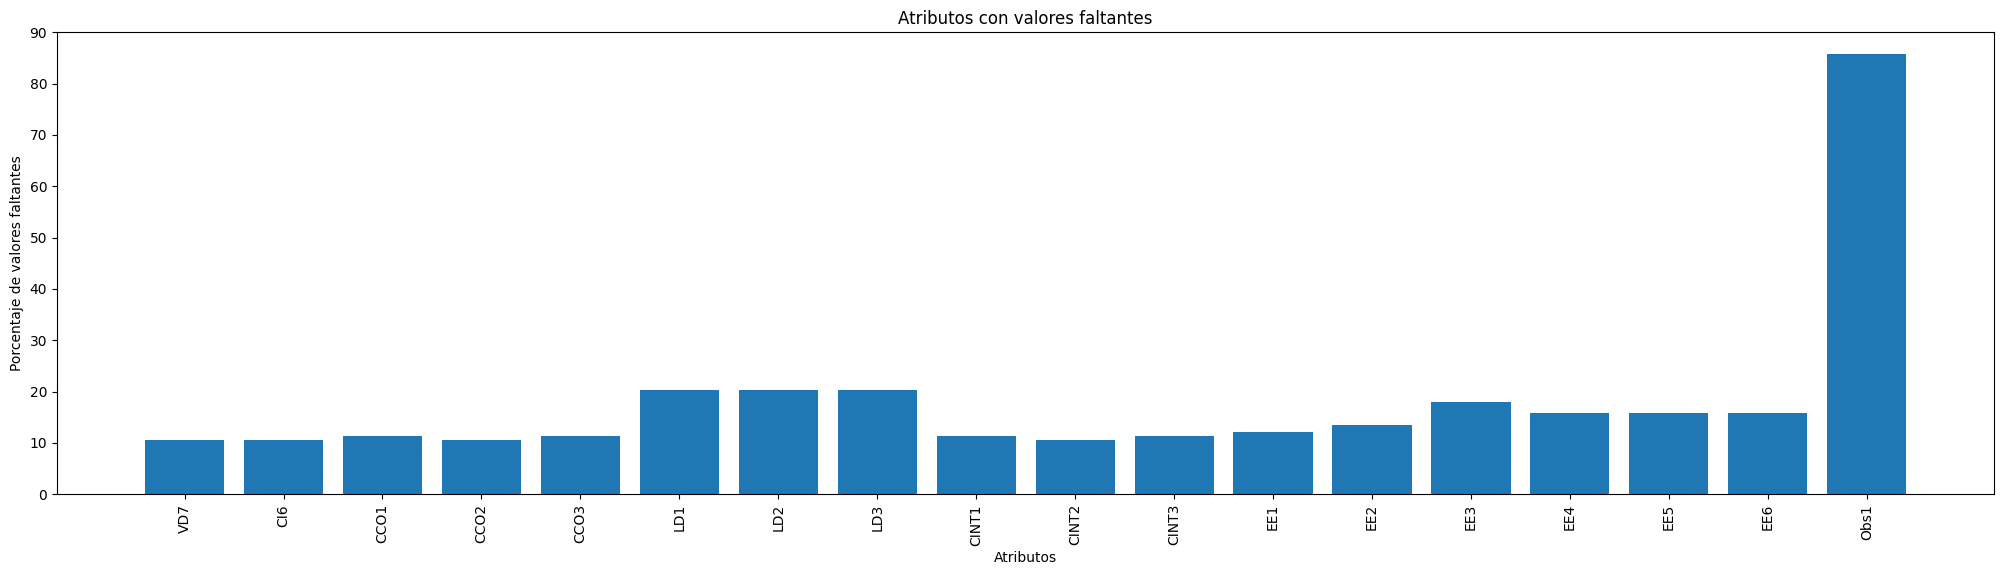

In [93]:
plt.figure(figsize=(25, 6))
plt.bar(attributes_with_missing, missing_percentage[attributes_with_missing])
plt.xlabel('Atributos')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Atributos con valores faltantes')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad

plt.show()

In [64]:
df_sin_nulos['SA1']

0      5.0
1      5.0
2      4.0
3      5.0
4      1.0
      ... 
135    5.0
137    5.0
138    NaN
139    5.0
140    5.0
Name: SA1, Length: 133, dtype: float64